## II. (1) Write a basic implementation of the ”GreedyKCenters” algorithm (described in the reading by S. Har-Peled, and discussed in class). Your algorithm should attempt to solve the classic K-centers problem, for any user-selected positive integer value K. The underlying distance function used in your algorithm should be the Euclidean distance, and your objective should be to minimize the maximum distance between any observation x i ∈ X and it’s closest center c j ∈ Q, i.e., to ﬁnd Q giving
- You can again assume the input data is given to you as a matrix X ∈ R N×d , and a positive integer K, as in I. 
- Your output should be a matrix Q ∈ R K×d containing the ﬁnal K d-dimensional centers, and the objective function value, i.e., the ﬁnal max x i ∈X (min c j ∈Q kx i − c j k 2 ) obtained.

In [40]:
import csv
import math
import numpy as np
from numpy.linalg import norm
import matplotlib.pyplot as plt

### Data visualization

In [41]:
with open('/Users/macbookpro/Desktop/IE529_Comp2/Dataset_1/clustering.csv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    x = list(reader)
    data_1 = np.array(x).astype("float")
    
    
with open('/Users/macbookpro/Desktop/IE529_Comp2/Dataset_2/ShapedData.csv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    x = list(reader)
    data_2 = np.array(x).astype("float")

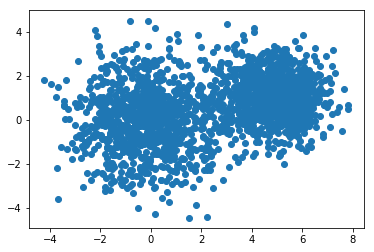

In [42]:
plt.scatter(data_1[:,0],data_1[:,1])
plt.show()

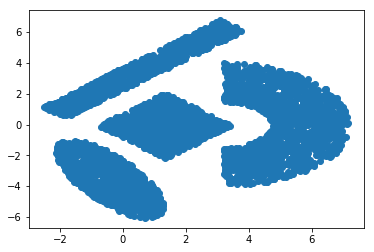

In [43]:
plt.scatter(data_2[:,0],data_2[:,1])
plt.show()

### Define functions

In [44]:
# def centroids_init(matrix, K):
#     index = [np.random.randint(low=0, high=len(matrix[:,0]))]
#     for count in range(1,K):
#         for p_index in index:
#             x, y = matrix[p_index]
#             s = np.array([[0, 0]])
#             for num in range(len(matrix[:,0])):
#                 if num != p_index:
#                     distance = math.sqrt((x - matrix[num][0])**2 + (x - matrix[num][1])**2)
#                     t = np.array([[distance, num]])
#                     s = np.concatenate((s, t), axis=0)
#             s = s[np.argsort(s[:, 0])]
#         index.append(int(s[-1][1]))
#     centroids = matrix[index]
#     return centroids


# Randomly initialize centroids
def centroids_init(matrix, K):
    index = np.random.randint(low=0, high=len(matrix[:,0]), size=K)
    centroids = matrix[index]
    return centroids

In [45]:
def find_farthest_point(X, Q):
    maxDist = 0
    maxIndex = 0
    for j in range(Q.shape[0]):
        for i in range(X.shape[0]):
            d = math.pow(norm((X[i]-Q[j]),2), 2)
            if (d >= maxDist):
                maxDist = d
                maxIndex = i
    return (maxIndex, X[[maxIndex]], maxDist)

In [46]:
def GreedyKCenters(X, Q):
    objFuncs = []
    for i in range(1, Q.shape[0]):
        Index, NewCentroids, Dist = find_farthest_point(X, Q)
        # Assign nee centroids
        Q[i] = NewCentroids
        # Remove the point which assigned to centroids
        X = np.delete(X, Index, axis = 0)
        # objective function -> L2 norm distance
        objFuncs.append(Dist)
    return Q, objFuncs[-1]

In [47]:
def find_closest_centroids(matrix, centroids):
    # Set m
    m = centroids.shape[0]
    
    # initialize distance matrix
    distance = np.zeros((matrix.shape[0], m))

    for i in range(matrix.shape[0]):
        for j in range(m):
            distance[i][j] = math.sqrt((centroids[j][0] - matrix[i][0])**2 + (centroids[j][1] - matrix[i][1])**2)
    idx = np.argmin(distance, axis=1)
#     new_centroids = centroids[idx]
    return idx

### Play with the first dataset

In [48]:
# Parameters settings
data = data_1
K = 3
firstCentroids = centroids_init(data, 1)
Q = np.zeros((K, 2))
Q[0] = firstCentroids

In [49]:
centroids, dist = GreedyKCenters(data, Q)
idx = find_closest_centroids(data, centroids)

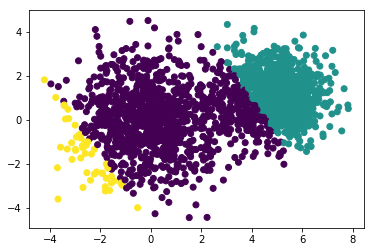

In [50]:
plt.scatter(data[:,0],data[:,1], c=idx)
plt.show()

In [51]:
# Centroids
centroids

array([[ 0.57365, -0.94986],
       [ 7.1976 ,  3.1657 ],
       [-3.6773 , -3.5965 ]])

In [52]:
# objective function
dist

163.99079884999998

### Play with the second dataset

In [53]:
# Parameters settings
data = data_2
K = 4
firstCentroids = centroids_init(data, 1)
Q = np.zeros((K, 2))
Q[0] = firstCentroids

In [54]:
centroids, dist = GreedyKCenters(data, Q)
idx = find_closest_centroids(data, centroids)

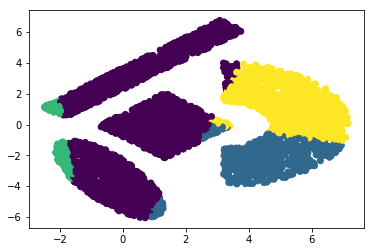

In [55]:
plt.scatter(data[:,0],data[:,1], c=idx)
plt.show()

In [56]:
# Centroids
centroids

array([[-1.443  ,  1.2215 ],
       [ 6.8767 , -1.5744 ],
       [-2.4871 ,  1.1324 ],
       [ 7.0904 , -0.82791]])

In [57]:
# objective function
dist

95.57132154610002

## II. (2) Write a basic implementation of the single-swap heuristic for which you try to improve the solution to the K-centers problem in II.1 by a implementing a series of ”swaps”. If Q is your current set of centers, and you make a single swap, giving Q new = Q − {c j } ∪ {o}, then you should replace Q with Q whenever the new objective value, that is the computed value for (1), is reduced by a factor of new (1 − τ). When there is no swap that improves the solution by this factor, the local search stops. Let τ = 0.05.

In [58]:
def swap(X, Q):
    dummy1, dummy2, cost = find_farthest_point(X, Q)
    cond = True
    while cond:
        new_Q = np.zeros(Q.shape)
        if Q.shape[0] == 0:
            cond = False
        i = np.random.randint(0,X.shape[0]) 
        j = np.random.randint(0,Q.shape[0]) # Centroids
        Q = np.delete(Q, j, axis=0)
        Q = np.append(Q, [X[i]], axis=0)
        X = np.delete(X, i, axis=0)
        dummy1, dummy2, new_cost = find_farthest_point(X, Q)
        if new_cost < cost:
            cond = False
            Flag = False
            break
    return X, Q, new_cost, Flag

#### Play with the second dataset

In [24]:
centroids, dist = GreedyKCenters(data, Q)
print (centroids)
print ("")
print (dist)

[[ 2.0709   5.3964 ]
 [ 3.0811   6.7565 ]
 [ 0.54923 -6.0252 ]
 [ 0.71578 -6.0515 ]]

169.63960270240003


In [31]:
cond = True
count = 0
t = 0.05
objFunc = []
while cond:
    new_X, new_Q, cost, flag = swap(data, centroids)
    if (flag == True):
        cond = False
    objFunc.append(cost)
    if (count > 0):
        if (objFunc[count] <= (1- t) * objFunc[count-1]):
            cond = False
    count += 1


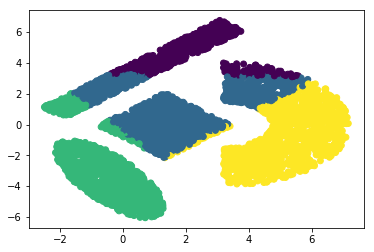

In [36]:
idx = find_closest_centroids(new_X, new_Q)
plt.scatter(new_X[:,0],new_X[:,1], c=idx-1)
plt.show()

In [37]:
new_Q

array([[ 2.0709,  5.3964],
       [ 1.9128,  1.0191],
       [-2.0769, -1.6016],
       [ 4.4443, -1.375 ]])

In [38]:
objFunc

[169.63960270240003, 165.13471652689992, 132.89076462440002]

#### Play with the first dataset

In [59]:
# Parameters settings
data = data_1
K = 3
firstCentroids = centroids_init(data, 1)
Q = np.zeros((K, 2))
Q[0] = firstCentroids
centroids, dist = GreedyKCenters(data, Q)


In [60]:
cond = True
count = 0
t = 0.05
objFunc = []
while cond:
    new_X, new_Q, cost, flag = swap(data, centroids)
    if (flag == True):
        cond = False
    objFunc.append(cost)
    if (count > 0):
        if (objFunc[count] <= (1- t) * objFunc[count-1]):
            cond = False
    count += 1


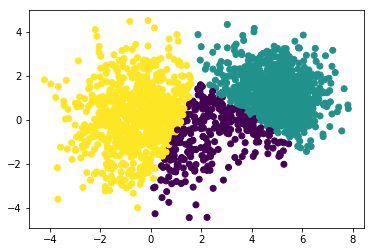

In [61]:
idx = find_closest_centroids(new_X, new_Q)
plt.scatter(new_X[:,0],new_X[:,1], c=idx-1)
plt.show()

In [62]:
new_Q

array([[ 2.3282 , -0.93878],
       [ 4.6583 ,  2.0664 ],
       [-0.21275,  0.1002 ]])

In [63]:
objFunc

[116.92489492999998, 101.55066376999999]